In [1]:
# Ignore warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Computations
import itertools

# Modelling Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import KFold, cross_val_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

# Visualization
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
fake = pd.read_csv('./bin_dataset/Fake.csv', delimiter = ',')
true = pd.read_csv('./bin_dataset/True.csv', delimiter = ',')

In [3]:
def drop_prefix(text,prefix='(Reuters)',n=5):
    ts = str.split(text,' ')
    if prefix in ts[:n]:
        return str.split(text,prefix)[-1]
    else:
        return text

In [4]:
fake['label']= 0
true['label']= 1

dataset = pd.DataFrame()
dataset = true.append(fake).sample(frac = 1, random_state = 1)
dataset.index = range(len(true) + len(fake))

In [9]:
dataset[0]

KeyError: 0

In [10]:
for i in range(dataset.shape[0]):
    dataset['text'][i] =  drop_prefix(dataset['text'][i])

In [13]:
dataset

,title,text,subject,date,label
0,EPA chief says Paris climate agreement 'bad de...,- The United States should continue to be “en...,politicsNews,"April 2, 2017",1
1,BREAKING NEWS: President Trump Announces Major...,President Trump just tweeted out a new policy ...,politics,"Jul 26, 2017",0
2,Trump says New Hampshire win not necessary to ...,- U.S. Republican presidential candidate Dona...,politicsNews,"February 7, 2016",1
3,Kremlin: U.S. sanctions aimed at turning busin...,- The Kremlin said on Thursday it was confide...,worldnews,"November 30, 2017",1
4,MUST WATCH: Kellyanne Conway PUNCHES BACK Afte...,Kellyanne Conway s response to Williams criti...,left-news,"Dec 27, 2016",0
...,...,...,...,...,...
44893,THIS YEAR: Let’s Make Christmas Great Again…,"This year, let s try something a little differ...",US_News,"December 25, 2016",0
44894,DEMOCRATS SELL Promo T-Shirt: “Democrats give ...,"Yes, the Democrats think it s a good thing to ...",politics,"Apr 20, 2017",0
44895,White House aides told to preserve materials i...,- The White House counsel’s office has sent a...,politicsNews,"March 2, 2017",1
44896,'Congratulations': EU moves to Brexit phase tw...,- The European Union agreed on Friday to move...,worldnews,"December 15, 2017",1


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [15]:
dataset.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [16]:
dataset['total'] = dataset['title'] + dataset['text']

In [17]:
cv = KFold(n_splits=5, random_state=1,shuffle=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(dataset['total'], dataset.label, test_size=0.20, random_state=0)

In [19]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english') 
# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)
# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [20]:
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
#Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
#Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [21]:
# Creating a function that outputs a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
def precision_recall(true_label, predicted_label):
    precision = precision_score(true_label, predicted_label)
    print('Precision: %f' % precision)

    recall = recall_score(true_label, predicted_label)
    print('Recall: %f' % recall)
    
    accuracy = metrics.accuracy_score(true_label, predicted_label)
    print('Accuracy: %f' % accuracy)
    
    f1score = metrics.f1_score(true_label, predicted_label)
    print('F1 Score: %f' % f1score)

In [23]:
nb_classifier_k = MultinomialNB(alpha=0.1)
scores = cross_val_score(nb_classifier_k, count_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
nb_classifier_k.fit(count_train, y_train)
pred_nb_c = nb_classifier_k.predict(count_test)
precision_recall(y_test, pred_nb_c)


# nb_classifier = MultinomialNB(alpha = 0.1)
# nb_classifier.fit(count_train, y_train)
# pred_nb_count = nb_classifier.predict(count_test)
# precision_recall(y_test, pred_nb_count)

0.9725485610512571 0.000913065673174629
Precision: 0.975901
Recall: 0.970000
Accuracy: 0.974165
F1 Score: 0.972941


In [24]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,1,.05):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(count_train, y_train)
    pred_tune = nb_classifier_tune.predict(count_test)
    precision_recall(y_test, pred_tune)
    print("Alpha: {:.2f} ".format(alpha))

Precision: 0.973561
Recall: 0.967674
Accuracy: 0.971938
F1 Score: 0.970609
Alpha: 0.00 
Precision: 0.976586
Recall: 0.970000
Accuracy: 0.974499
F1 Score: 0.973282
Alpha: 0.05 
Precision: 0.975901
Recall: 0.970000
Accuracy: 0.974165
F1 Score: 0.972941
Alpha: 0.10 
Precision: 0.976352
Recall: 0.969767
Accuracy: 0.974276
F1 Score: 0.973049
Alpha: 0.15 
Precision: 0.975667
Recall: 0.969767
Accuracy: 0.973942
F1 Score: 0.972708
Alpha: 0.20 
Precision: 0.974509
Recall: 0.969070
Accuracy: 0.973051
F1 Score: 0.971782
Alpha: 0.25 
Precision: 0.974947
Recall: 0.968372
Accuracy: 0.972940
F1 Score: 0.971649
Alpha: 0.30 
Precision: 0.974701
Recall: 0.967674
Accuracy: 0.972494
F1 Score: 0.971175
Alpha: 0.35 
Precision: 0.974227
Recall: 0.966977
Accuracy: 0.971938
F1 Score: 0.970588
Alpha: 0.40 
Precision: 0.973999
Recall: 0.966977
Accuracy: 0.971826
F1 Score: 0.970475
Alpha: 0.45 
Precision: 0.973524
Recall: 0.966279
Accuracy: 0.971269
F1 Score: 0.969888
Alpha: 0.50 
Precision: 0.973062
Recall: 0.96

0.9725485610512571 0.000913065673174629
Precision: 0.976586
Recall: 0.970000
Accuracy: 0.974499
F1 Score: 0.973282


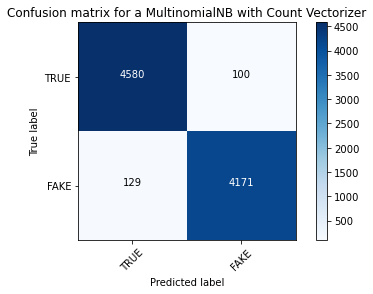

In [25]:
# Let's re-run our fine-tuned model and plot the confusion matrix
nb_classifier = MultinomialNB(alpha = 0.05)
scores = cross_val_score(nb_classifier_k, count_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
precision_recall(y_test, pred_nb_count)
cm = metrics.confusion_matrix(y_test, pred_nb_count, labels=[0,1])
    
    
plot_confusion_matrix(cm, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Count Vectorizer')

In [26]:
nb_classifier = MultinomialNB(alpha = 0.1)
scores = cross_val_score(nb_classifier_k, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
precision_recall(y_test, pred_nb_tfidf)

0.9663121359297053 0.0012077112313324699
Precision: 0.966721
Recall: 0.959302
Accuracy: 0.964699
F1 Score: 0.962998


In [27]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,0.1,.01):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(tfidf_train, y_train)
    pred_tune = nb_classifier_tune.predict(tfidf_test)
    precision_recall(y_test, pred_tune)
    print("Alpha: {:.2f} ".format(alpha))

Precision: 0.968291
Recall: 0.965814
Accuracy: 0.968486
F1 Score: 0.967051
Alpha: 0.00 
Precision: 0.970616
Recall: 0.967907
Accuracy: 0.970601
F1 Score: 0.969259
Alpha: 0.01 
Precision: 0.970355
Recall: 0.966744
Accuracy: 0.969933
F1 Score: 0.968546
Alpha: 0.02 
Precision: 0.968721
Recall: 0.965116
Accuracy: 0.968374
F1 Score: 0.966915
Alpha: 0.03 
Precision: 0.967795
Recall: 0.964419
Accuracy: 0.967595
F1 Score: 0.966104
Alpha: 0.04 
Precision: 0.968677
Recall: 0.963721
Accuracy: 0.967706
F1 Score: 0.966193
Alpha: 0.05 
Precision: 0.967983
Recall: 0.963256
Accuracy: 0.967149
F1 Score: 0.965614
Alpha: 0.06 
Precision: 0.967712
Recall: 0.961860
Accuracy: 0.966370
F1 Score: 0.964777
Alpha: 0.07 
Precision: 0.966994
Recall: 0.960698
Accuracy: 0.965479
F1 Score: 0.963836
Alpha: 0.08 
Precision: 0.966737
Recall: 0.959767
Accuracy: 0.964922
F1 Score: 0.963240
Alpha: 0.09 


0.9663121359297053 0.0012077112313324699
Precision: 0.967712
Recall: 0.961860
Accuracy: 0.966370
F1 Score: 0.964777


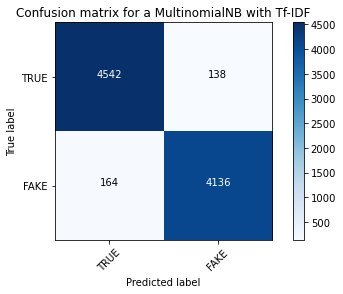

In [28]:
# Let's run the optimized model with best value of hyperparameter and check the confusion matrix
nb_classifier = MultinomialNB(alpha = 0.07)
scores = cross_val_score(nb_classifier_k, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
precision_recall(y_test, pred_nb_tfidf)
cm2 = metrics.confusion_matrix(y_test, pred_nb_tfidf, labels=[0,1])
plot_confusion_matrix(cm2, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Tf-IDF')

0.9874157407972983 0.0013021471959391926
Precision: 0.986568
Recall: 0.990698
Accuracy: 0.989087
F1 Score: 0.988628


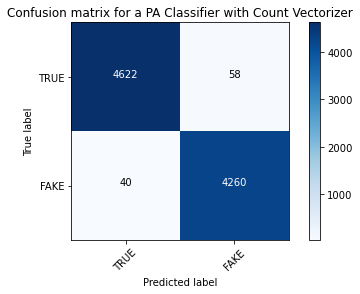

In [29]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_classifier = PassiveAggressiveClassifier(max_iter=10)
scores = cross_val_score(linear_classifier, count_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
linear_classifier.fit(count_train, y_train)
pred_linear_count = linear_classifier.predict(count_test)
precision_recall(y_test, pred_linear_count)
cm6 = metrics.confusion_matrix(y_test, pred_linear_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Count Vectorizer')

0.9876663402236225 0.001280895179535124
Precision: 0.989344
Recall: 0.993256
Accuracy: 0.991648
F1 Score: 0.991296


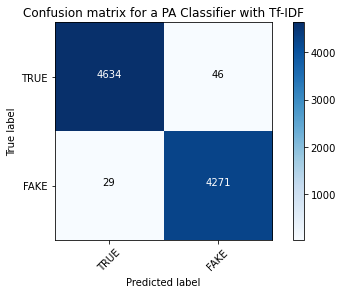

In [30]:
linear_classifier = PassiveAggressiveClassifier(max_iter=10)
scores = cross_val_score(linear_classifier, count_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
linear_classifier.fit(tfidf_train, y_train)
pred_linear_tfidf = linear_classifier.predict(tfidf_test)
precision_recall(y_test, pred_linear_tfidf)

cm5 = metrics.confusion_matrix(y_test, pred_linear_tfidf, labels=[0,1])
plot_confusion_matrix(cm5, classes=['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Tf-IDF')

0.9903947570776956 0.001294154242936985
Precision: 0.987960
Recall: 0.992326
Accuracy: 0.990535
F1 Score: 0.990138


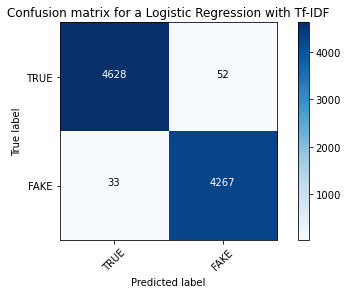

In [31]:
logreg = LogisticRegression(C=1e5)
scores = cross_val_score(logreg, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
logreg.fit(tfidf_train, y_train)
pred_logreg_tfidf = logreg.predict(tfidf_test)
pred_logreg_tfidf_proba = logreg.predict_proba(tfidf_test)[:,1]
precision_recall(y_test, pred_logreg_tfidf)

cm4 = metrics.confusion_matrix(y_test, pred_logreg_tfidf, labels=[0,1])
plot_confusion_matrix(cm4, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Tf-IDF')

0.9873322296178773 0.0013840272174140992
Precision: 0.986559
Recall: 0.990000
Accuracy: 0.988753
F1 Score: 0.988276


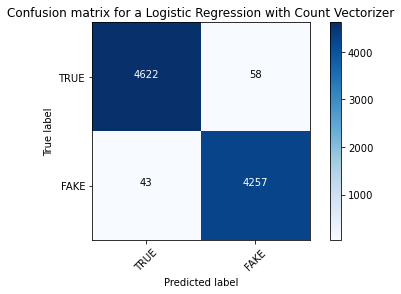

In [32]:
logreg = LogisticRegression(C=1e5)
scores = cross_val_score(logreg, count_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
logreg.fit(count_train, y_train)
pred_logreg_count = logreg.predict(count_test)
precision_recall(y_test, pred_logreg_count)

cm3 = metrics.confusion_matrix(y_test, pred_logreg_count, labels=[0,1])
plot_confusion_matrix(cm3, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Count Vectorizer')

0.9530876036806776 0.00341968135482184
Precision: 0.961683
Recall: 0.951395
Accuracy: 0.958575
F1 Score: 0.956512


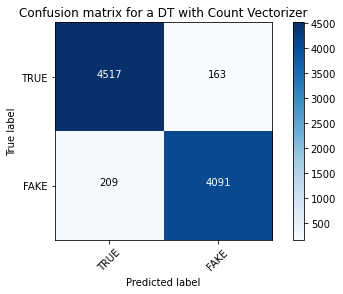

In [34]:
dtclass = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
scores = cross_val_score(dtclass, count_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
dtclass.fit(count_train, y_train)
pred_dt_count = dtclass.predict(count_test)
precision_recall(y_test, pred_dt_count)

cm4 = metrics.confusion_matrix(y_test, pred_dt_count, labels=[0,1])
plot_confusion_matrix(cm4, classes=['TRUE','FAKE'], title ='Confusion matrix for a DT with Count Vectorizer')

0.9528091723622374 0.0017365081734873008
Precision: 0.961475
Recall: 0.946047
Accuracy: 0.956013
F1 Score: 0.953698


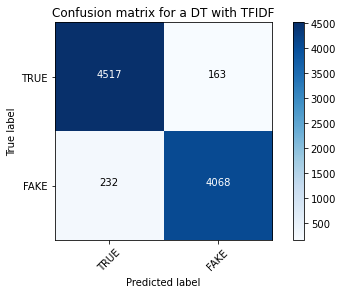

In [35]:
dtclass = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
scores = cross_val_score(dtclass, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
dtclass.fit(tfidf_train, y_train)
pred_dt_count = dtclass.predict(tfidf_test)
precision_recall(y_test, pred_dt_count)

cm5 = metrics.confusion_matrix(y_test, pred_dt_count, labels=[0,1])
plot_confusion_matrix(cm5, classes=['TRUE','FAKE'], title ='Confusion matrix for a DT with TFIDF')

In [ ]:
rfclass = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
scores = cross_val_score(rfclass, count_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
rfclass.fit(count_train, y_train)
pred_rf_count = rfclass.predict(count_test)
precision_recall(y_test, pred_rf_count)

cm6 = metrics.confusion_matrix(y_test, pred_rf_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a RF with Count Vectorizer')

In [ ]:
rfclass = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
scores = cross_val_score(rfclass, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
rfclass.fit(tfidf_train, y_train)
pred_rf_count = rfclass.predict(tfidf_test)
precision_recall(y_test, pred_rf_count)

cm6 = metrics.confusion_matrix(y_test, pred_rf_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a RF with TFIDF Vectorizer')

In [ ]:
svclass = SVC(kernel = 'linear', random_state = 0)
scores = cross_val_score(svclass, count_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
svclass.fit(count_train, y_train)
pred_sv_count = svclass.predict(count_test)
precision_recall(y_test, pred_sv_count)

cm6 = metrics.confusion_matrix(y_test, pred_sv_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a LSVM with Count Vectorizer')

In [ ]:
svclass = SVC(kernel = 'linear', random_state = 0)
scores = cross_val_score(svclass, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
svclass.fit(tfidf_train, y_train)
pred_sv_count = svclass.predict(tfidf_test)
precision_recall(y_test, pred_sv_count)

cm6 = metrics.confusion_matrix(y_test, pred_sv_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a LSVM with TFIDF Vectorizer')

In [ ]:
knnclass = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
scores = cross_val_score(knnclass, count_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
knnclass.fit(count_train, y_train)
pred_knn_count = knnclass.predict(count_test)
precision_recall(y_test, pred_knn_count)

cm6 = metrics.confusion_matrix(y_test, pred_knn_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a KNN with Count Vectorizer')

In [ ]:
knnclass = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
scores = cross_val_score(knnclass, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
knnclass.fit(tfidf_train, y_train)
pred_knn_count = knnclass.predict(tfidf_test)
precision_recall(y_test, pred_knn_count)

cm6 = metrics.confusion_matrix(y_test, pred_knn_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a KNN with Count Vectorizer')

In [ ]:
# nltk.download('stopwords')
# nltk.download('punkt')